In [1]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/clone_counts/"
# se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta.tsv"
# sample_names = "Control,Flt3l,Input"
# min_cell = 10

se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/donor0/cells_meta.tsv"
outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/annotation_clones/clone_counts/donor0" 
sample_names = "Input,Flt3l"
min_cell = 10


# se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct/clones/variants_init/knn/kparam_30/donor3/cells_meta.tsv"
# outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct/clones/variants_init/knn/kparam_30/annotation_clones/clone_counts/donor3"
# sample_names = "Input,Flt3l"
# min_cell = 10

In [2]:
sample_names = sample_names.split(",")
sample_names

['Input', 'Flt3l']

In [3]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
%matplotlib inline

In [5]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
se_cells_meta

,Unnamed: 0,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,cluster_labels
0,Flt3l_AAACTCGTCTTACGGA-1,Flt3l,2577,2577,8882,1154,32,19,495,1811,...,4,3144,2629,AAACTCGTCTTACGGA-1_Flt3l,Flt3l_AAACTCGTCTTACGGA-1,27,0,Flt3l,0_27,erythroid
1,Flt3l_AAACTGCGTTTGCCCT-1,Flt3l,1051,1051,3692,419,20,17,161,700,...,1,1471,1343,AAACTGCGTTTGCCCT-1_Flt3l,Flt3l_AAACTGCGTTTGCCCT-1,9,0,Flt3l,0_9,neutrophil
2,Flt3l_AAAGATGGTAAACGTA-1,Flt3l,1742,1742,6601,823,19,22,281,1831,...,6,2146,1916,AAAGATGGTAAACGTA-1_Flt3l,Flt3l_AAAGATGGTAAACGTA-1,27,0,Flt3l,0_27,eosonophil
3,Flt3l_AAAGGATAGGGTCTGA-1,Flt3l,1680,1680,6084,743,33,21,376,1459,...,3,2285,1985,AAAGGATAGGGTCTGA-1_Flt3l,Flt3l_AAAGGATAGGGTCTGA-1,13,0,Flt3l,0_13,MPP/CMP/GMP B
4,Flt3l_AAAGGATCAGATTAAG-1,Flt3l,1904,1904,5605,813,16,14,325,805,...,9,2268,2004,AAAGGATCAGATTAAG-1_Flt3l,Flt3l_AAAGGATCAGATTAAG-1,13,0,Flt3l,0_13,MPP/CMP/GMP D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,Input_TTTACGTTCCTTACGC-1,Input,6027,6027,32289,9938,143,117,1177,9010,...,2,7483,4978,TTTACGTTCCTTACGC-1_Input,Input_TTTACGTTCCTTACGC-1,57,0,Input,0_57,MPP/CMP/GMP
1011,Input_TTTGAGGGTCAGAGTG-1,Input,8044,8044,33587,11281,136,155,1539,7244,...,0,9298,5925,TTTGAGGGTCAGAGTG-1_Input,Input_TTTGAGGGTCAGAGTG-1,74,0,Input,0_74,macrophage
1012,Input_TTTGAGGGTGGCCTTG-1,Input,5912,5912,29726,7626,161,132,1067,10793,...,0,6525,4563,TTTGAGGGTGGCCTTG-1_Input,Input_TTTGAGGGTGGCCTTG-1,11,0,Input,0_11,macrophage
1013,Input_TTTGGTTTCTGAGTCA-1,Input,11483,11483,46672,17946,189,182,1899,6351,...,0,13275,7406,TTTGGTTTCTGAGTCA-1_Input,Input_TTTGGTTTCTGAGTCA-1,13,0,Input,0_13,macrophage


In [6]:
group_counts = se_cells_meta.groupby(["condition", "donor"]).size()
group_counts

condition  donor
Flt3l      0        418
Input      0        597
dtype: int64

### Remove None before normalizing

In [7]:
def plots(df, name, scatter_hue_col=None):
    f, ax =plt.subplots(figsize=(12,12))
    if df.shape[0] > 0:
        df[["ncells"]].plot.bar(ax=ax)
    else:
        f = plt.figure()
        plt.savefig(join(outdir, name+".barplot_conditions.svg"))
        plt.savefig(join(outdir, name+".barplot_conditions.png"))
        plt.savefig(join(outdir, name+".barplot.svg"))
        plt.savefig(join(outdir, name+".conditionScatter.svg"))
        plt.savefig(join(outdir, name+".conditionScatter.png"))
        return
    
    plt.savefig(join(outdir, name+".barplot.png"))
    plt.savefig(join(outdir, name+".barplot.svg"))
    
    f, ax =plt.subplots(figsize=(12,12))
    df.drop(["ncells", "donor"],axis=1).plot.bar(stacked=True, ax=ax)
    plt.savefig(join(outdir, name+".barplot_conditions.png"))
    plt.savefig(join(outdir, name+".barplot_conditions.svg"))
    
    
    cultured_inds = set(df.columns.values) - {"Input", "ncells","donor"}
    df["cultured"] = df[cultured_inds].sum(axis=1)
    
    # Save this figure even if empty
    f, ax = plt.subplots(figsize=(12,12))
    if "Input" in df.columns and len(sample_names)>1:
        sns.scatterplot(data=df, x="Input", y="cultured", hue=scatter_hue_col, s=24, ax=ax)
        ax.set_box_aspect(1)
    plt.savefig(join(outdir, name+".conditionScatter.png"))
    plt.savefig(join(outdir, name+".conditionScatter.svg"))

    # Only save this figure if data there
    if len(sample_names) > 1:
        if sample_names[0] in df.columns and sample_names[1] in df.columns:
            f, ax =plt.subplots(figsize=(12,12))
            sns.scatterplot(data=df, x=sample_names[0], y=sample_names[1], hue=scatter_hue_col, s=24, ax=ax)
            ax.set_box_aspect(1)
            plt.savefig(join(outdir, name+".conditionScatter_comp02.png"))
            plt.savefig(join(outdir, name+".conditionScatter_comp02.svg"))    

    return

In [8]:
clone_counts = se_cells_meta.groupby(["name", "condition","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("condition")["ncells"]

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_counts_df

clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=min_cell]
# if clone_counts_filt_10_df.shape[0] == 0:
#     clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=2]

In [9]:
clone_counts_filt_10_df

,donor,ncells,Flt3l,Input
name,,,,
0_9,0,150,73.0,77.0
0_10,0,130,46.0,84.0
0_11,0,117,52.0,65.0
0_13,0,79,57.0,22.0
0_12,0,79,44.0,35.0
0_14,0,44,22.0,22.0
0_15,0,23,7.0,16.0
0_24,0,15,0.0,15.0
0_18,0,14,3.0,11.0


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


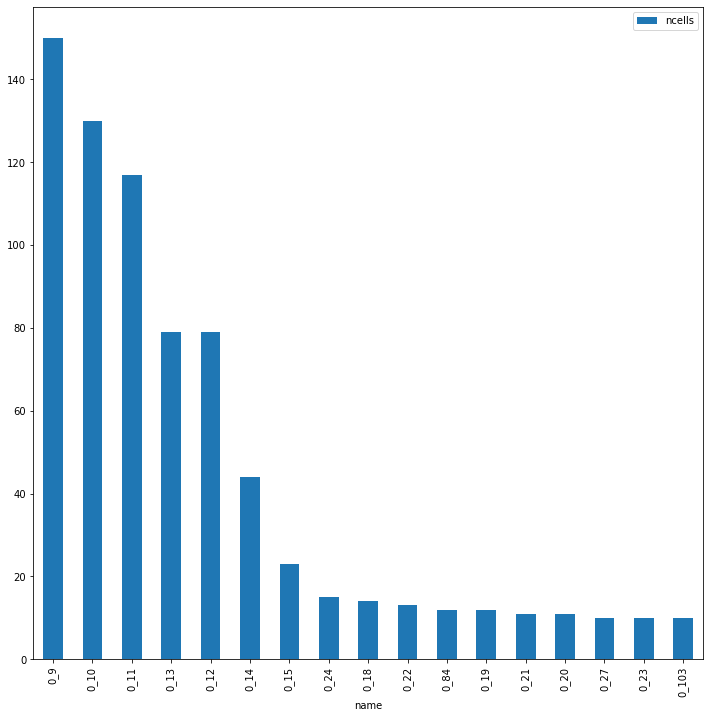

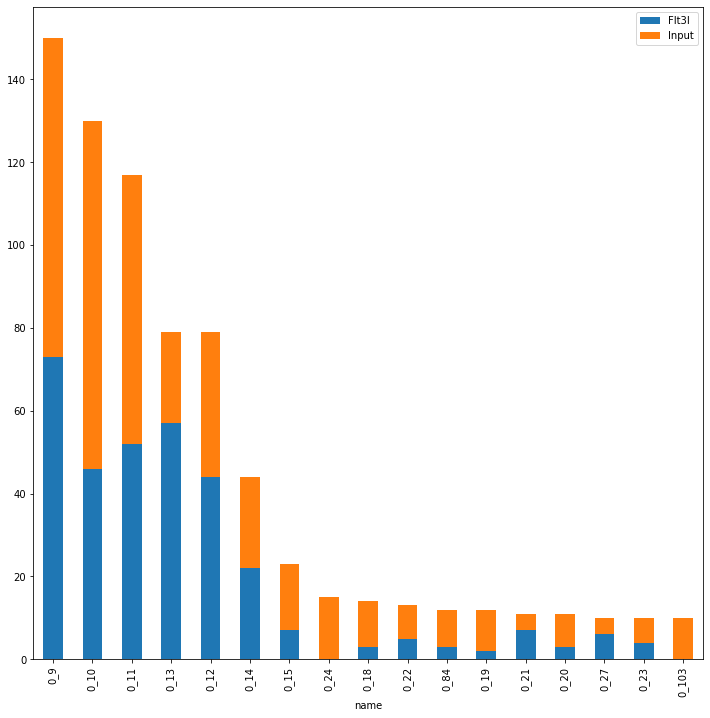

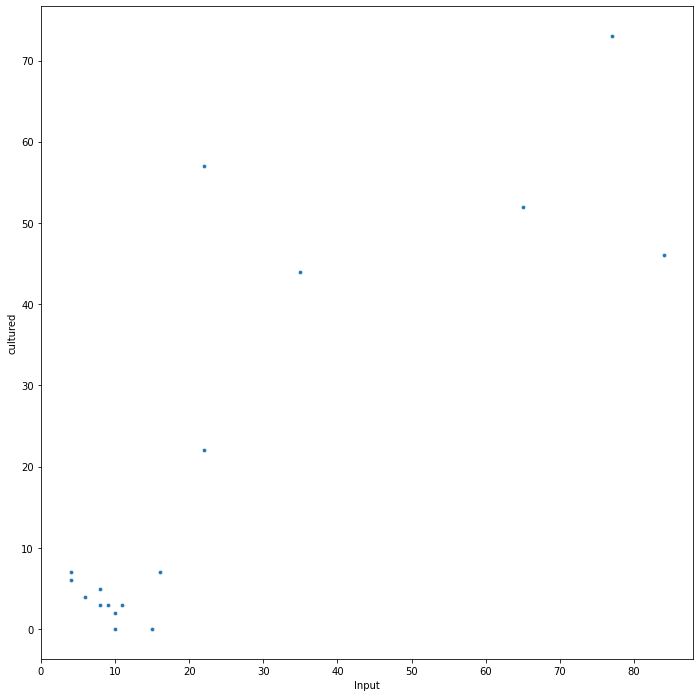

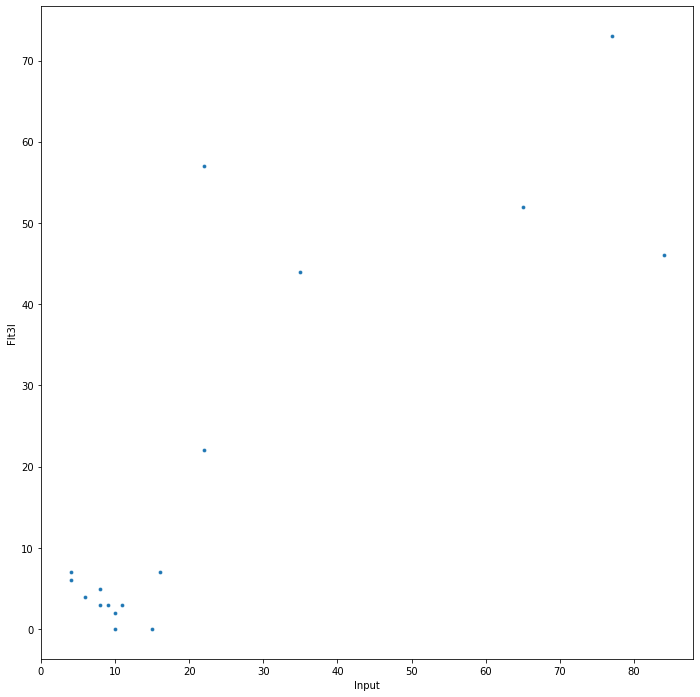

In [10]:
%matplotlib inline
plots(clone_counts_filt_10_df,
      name="clone_counts")

# Normalize

In [11]:
clone_counts

,name,condition,donor,ncells
0,0_10,Flt3l,0,46
1,0_10,Input,0,84
2,0_101,Flt3l,0,2
3,0_101,Input,0,4
4,0_102,Input,0,3
...,...,...,...,...
129,0_94,Input,0,2
130,0_96,Flt3l,0,2
131,0_96,Input,0,1
132,0_98,Flt3l,0,2


In [12]:
clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/group_counts.loc[(x["condition"], x["donor"])] , axis=1)

print("sum of normed values", clone_norm.groupby(["condition", "donor"]).sum()["ncells"])

#clone_norm = se_cells_meta.groupby(["name", "condition","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("condition")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df




sum of normed values condition  donor
Flt3l      0        1.0
Input      0        1.0
Name: ncells, dtype: float64


,donor,ncells,Flt3l,Input
name,,,,
0_9,0,0.303619,0.174641,0.128978
0_10,0,0.250751,0.110048,0.140704
0_11,0,0.233280,0.124402,0.108878
0_13,0,0.173215,0.136364,0.036851
0_12,0,0.163890,0.105263,0.058626
...,...,...,...,...
0_72,0,0.003350,0.000000,0.003350
0_52,0,0.003350,0.000000,0.003350
0_55,0,0.003350,0.000000,0.003350


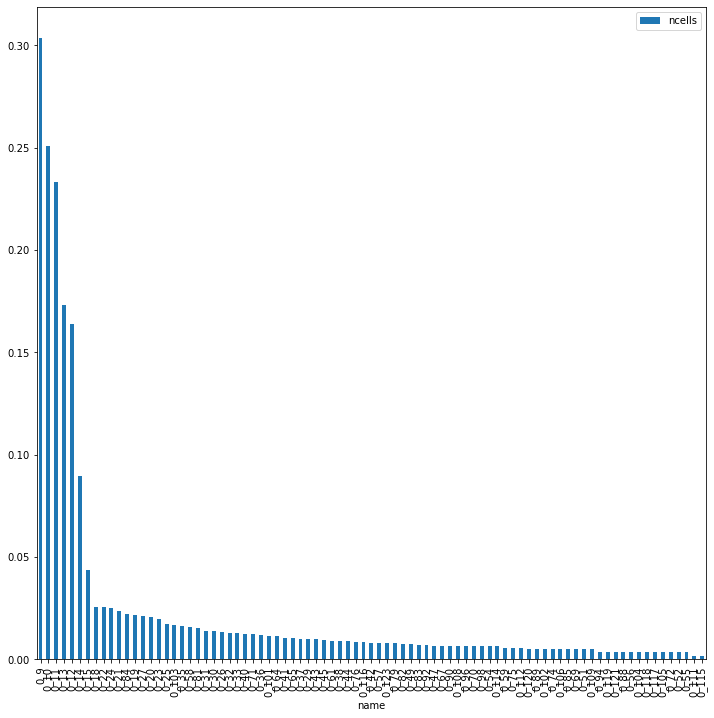

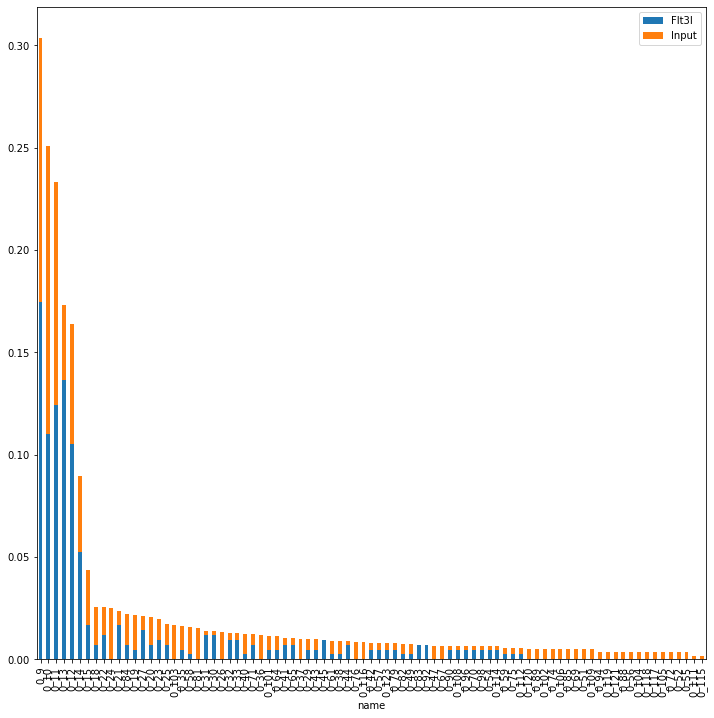

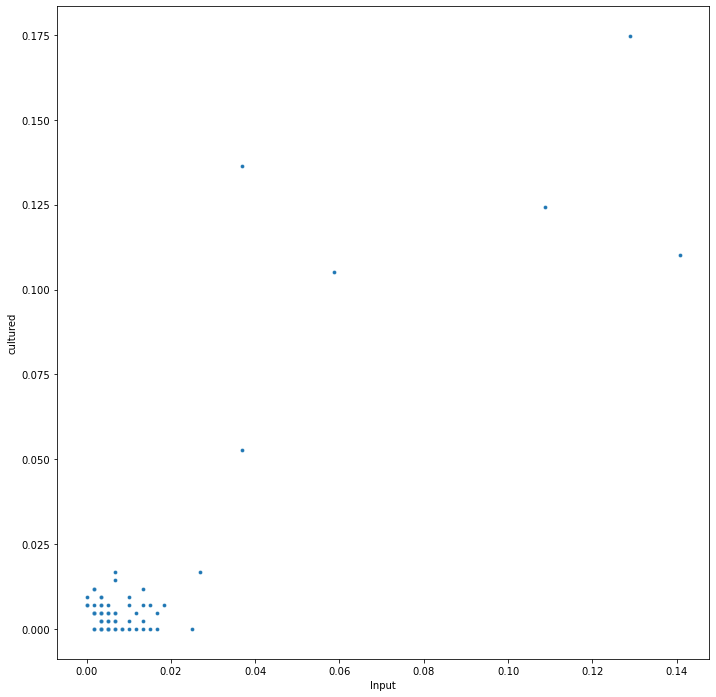

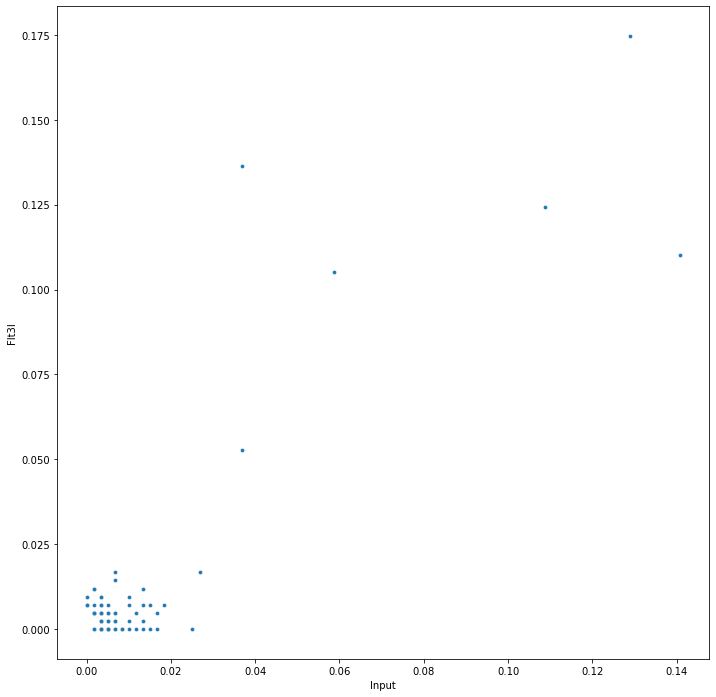

In [13]:
plots(clone_norm_df,
      name="normalized_counts")

## Only top clones

In [14]:
cell_25 = keep_top_clones(clone_counts_filt_10_df, min_cell=min_cell).index

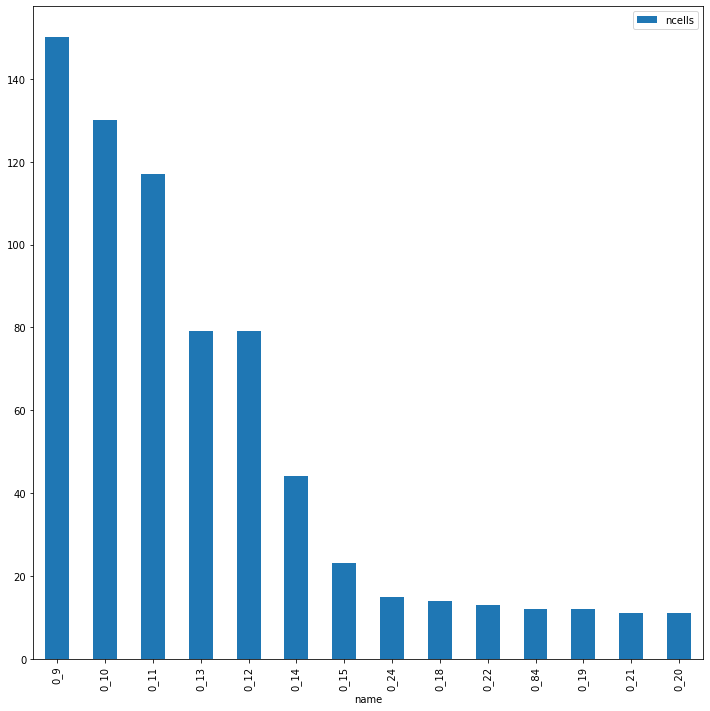

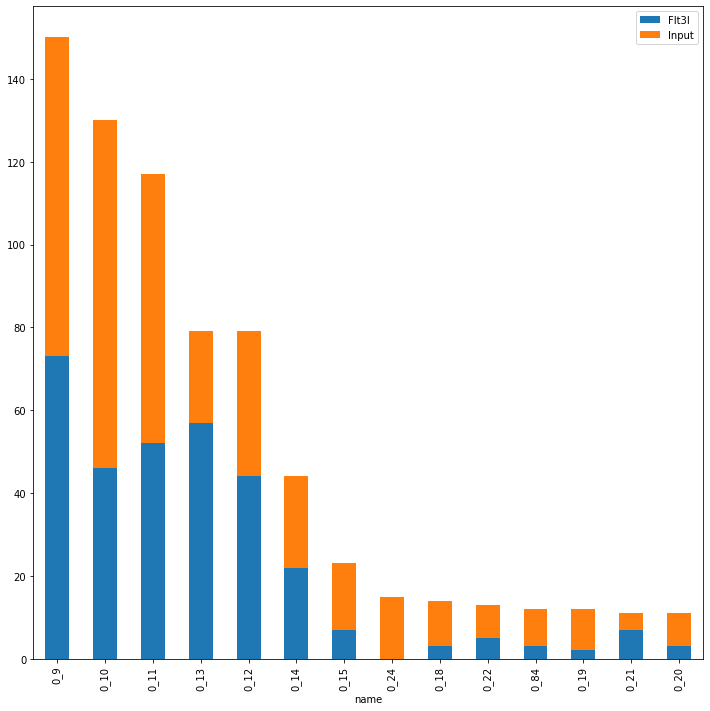

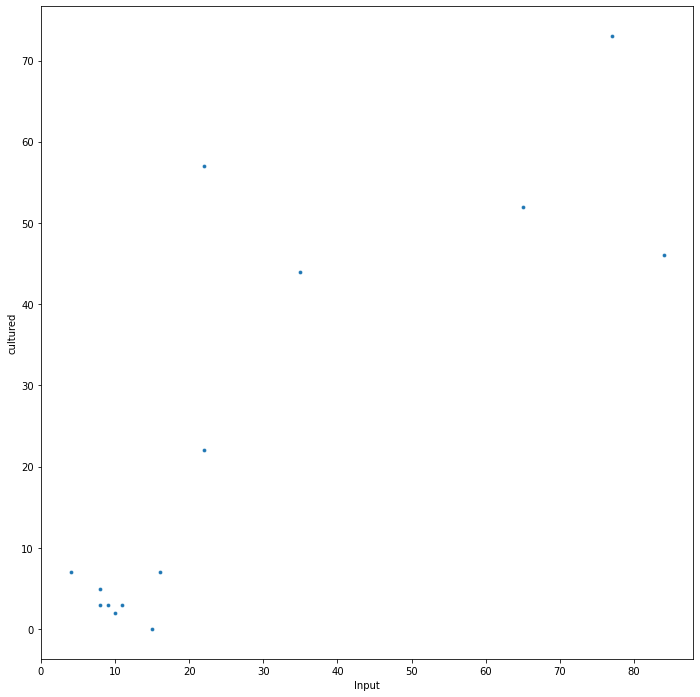

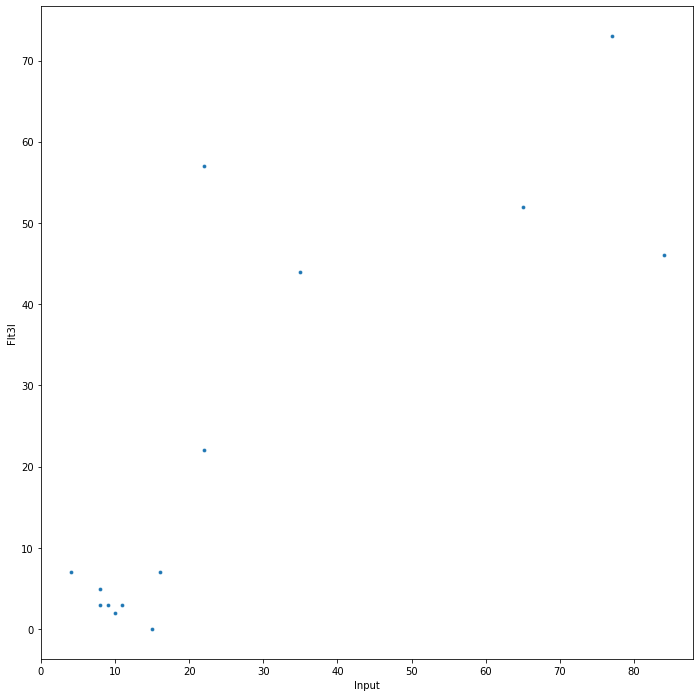

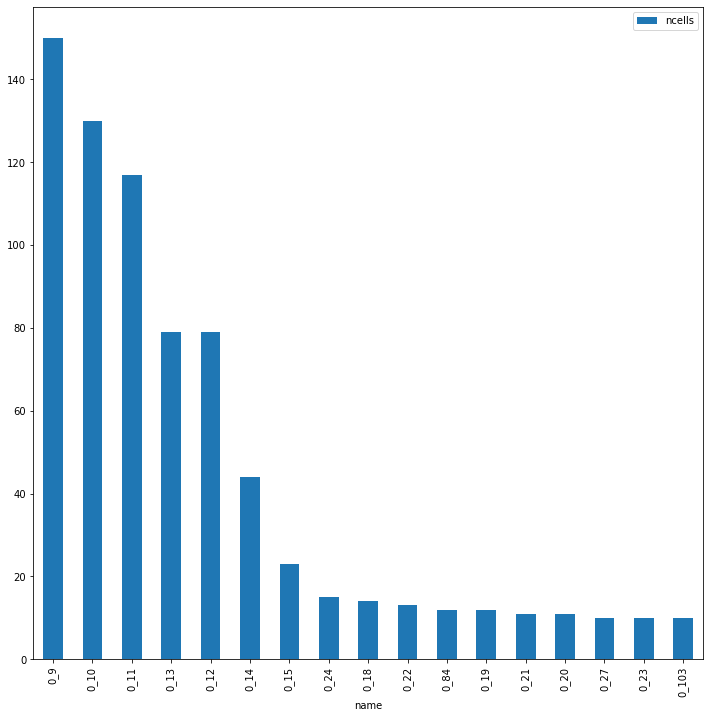

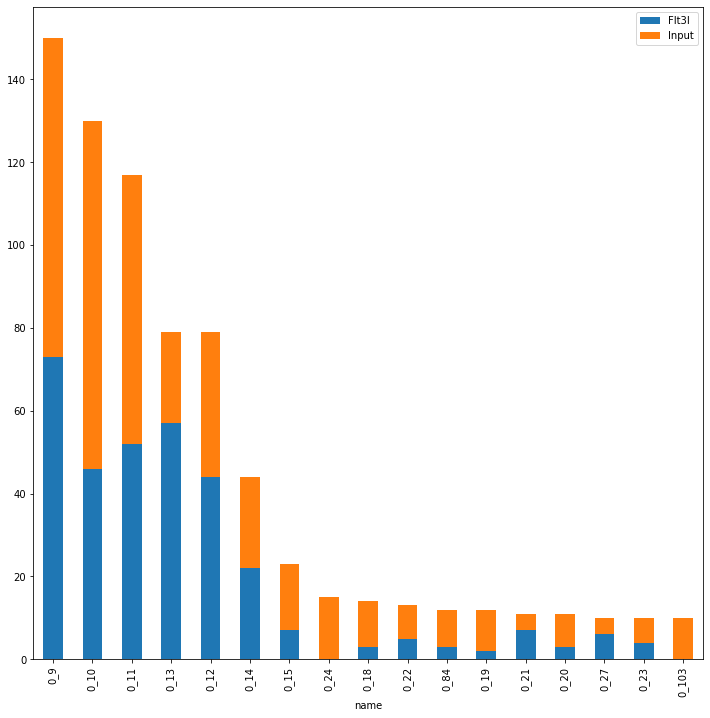

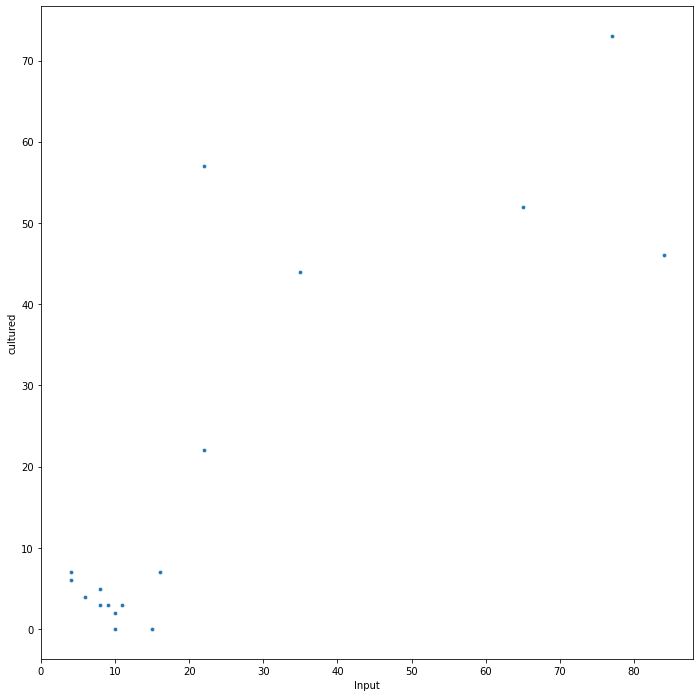

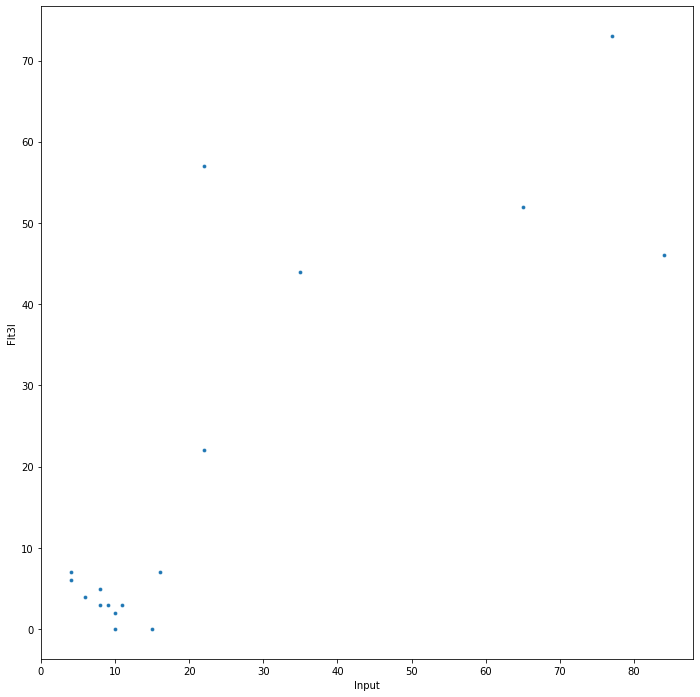

In [15]:
if "cultured" in clone_counts_filt_10_df.columns:
    clone_counts_filt_10_df = clone_counts_filt_10_df.drop("cultured",axis=1)
plots(keep_top_clones(clone_counts_filt_10_df, n_top=20, min_cell=min_cell),
      name=f"top20_minCell{min_cell}_clone_counts")

plots(keep_top_clones(clone_counts_filt_10_df, n_top=20, min_cell=2),
      name=f"top20_minCell{min_cell}_clone_counts")

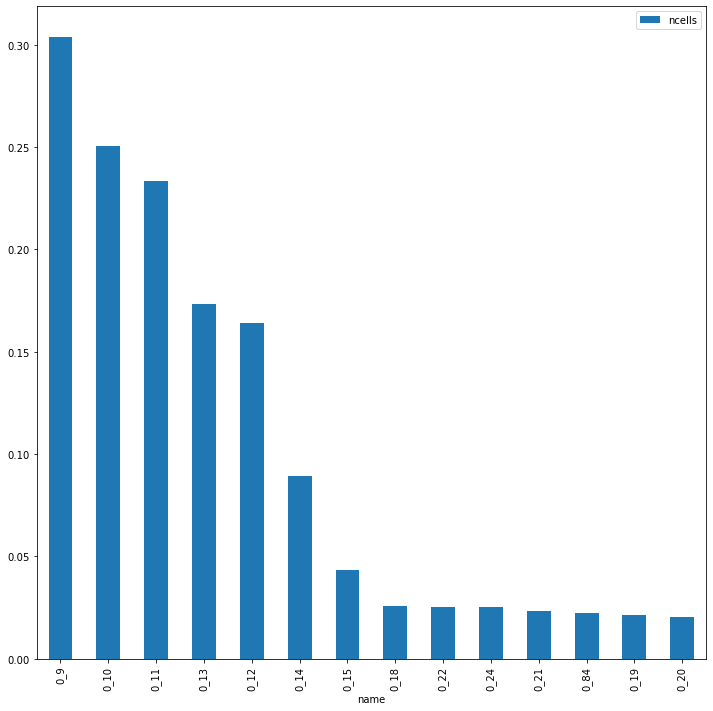

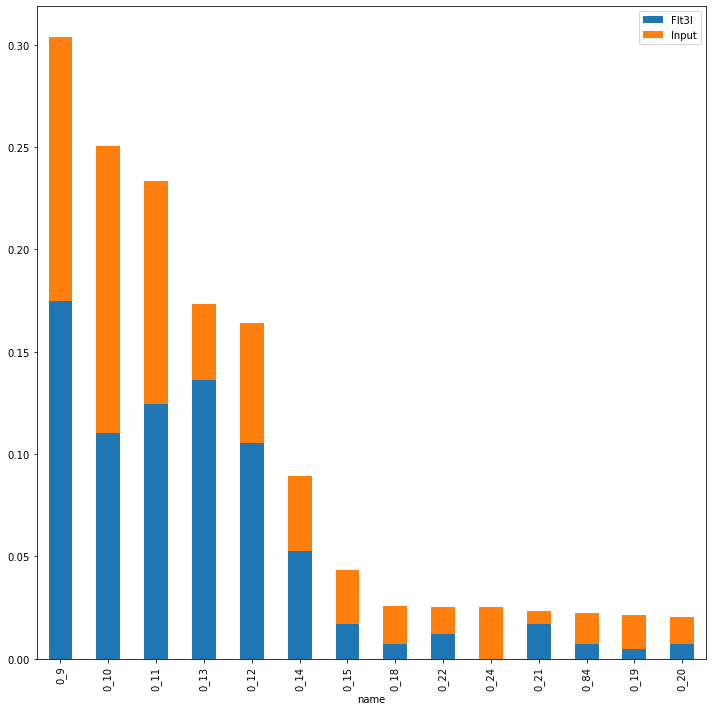

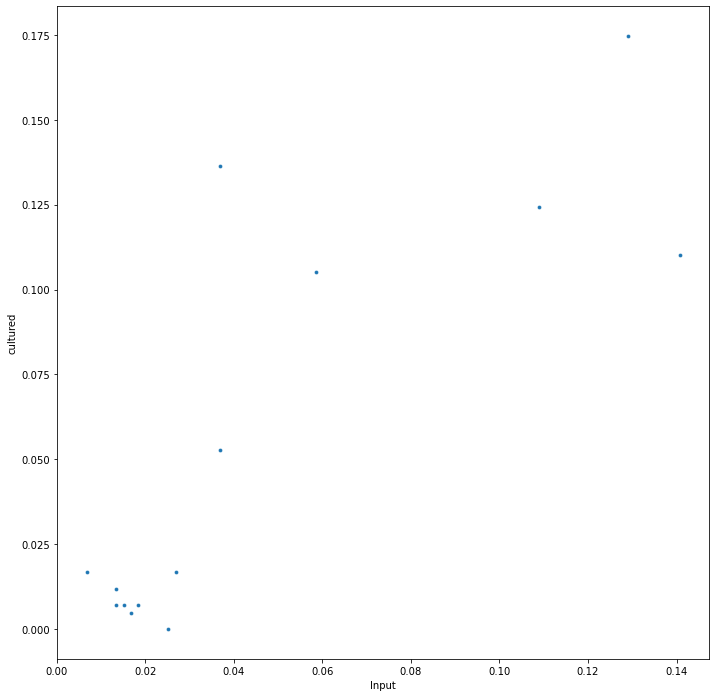

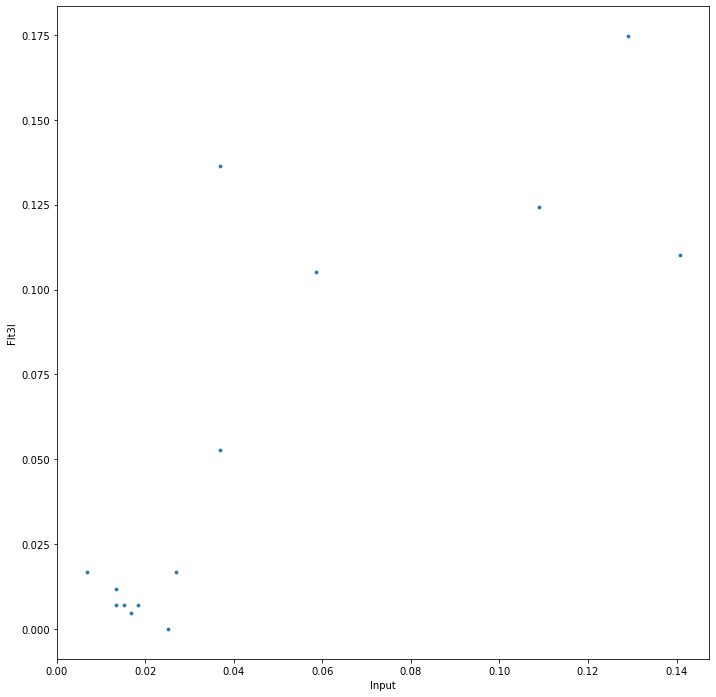

In [16]:
if "cultured" in clone_norm_df.columns:
    clone_norm_df = clone_norm_df.drop("cultured", axis=1)
plots(keep_top_clones(clone_norm_df.loc[cell_25], n_top=20, min_cell=0),
     name=f"top20_minCell{min_cell}_clone_normalized_counts")

In [17]:
outdir

'/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct_constraints_min_both_pct_0.5/clones/variants_simpleUnion/knn/kparam_30/annotation_clones/clone_counts/donor0'

## Split by donors

In [18]:
clone_counts

,name,condition,donor,ncells
0,0_10,Flt3l,0,46
1,0_10,Input,0,84
2,0_101,Flt3l,0,2
3,0_101,Input,0,4
4,0_102,Input,0,3
...,...,...,...,...
129,0_94,Input,0,2
130,0_96,Flt3l,0,2
131,0_96,Input,0,1
132,0_98,Flt3l,0,2


0
sum of normed values condition  donor
Flt3l      0        1.0
Input      0        1.0
Name: ncells, dtype: float64


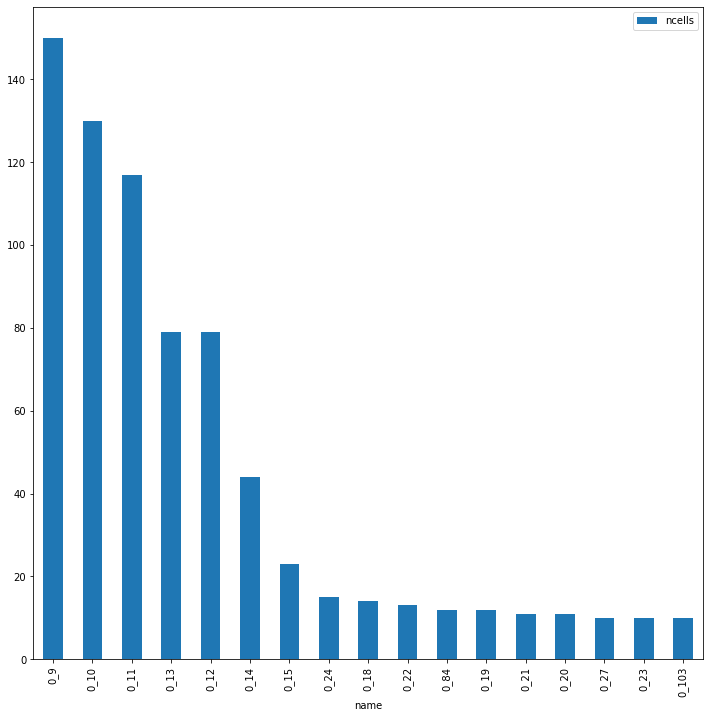

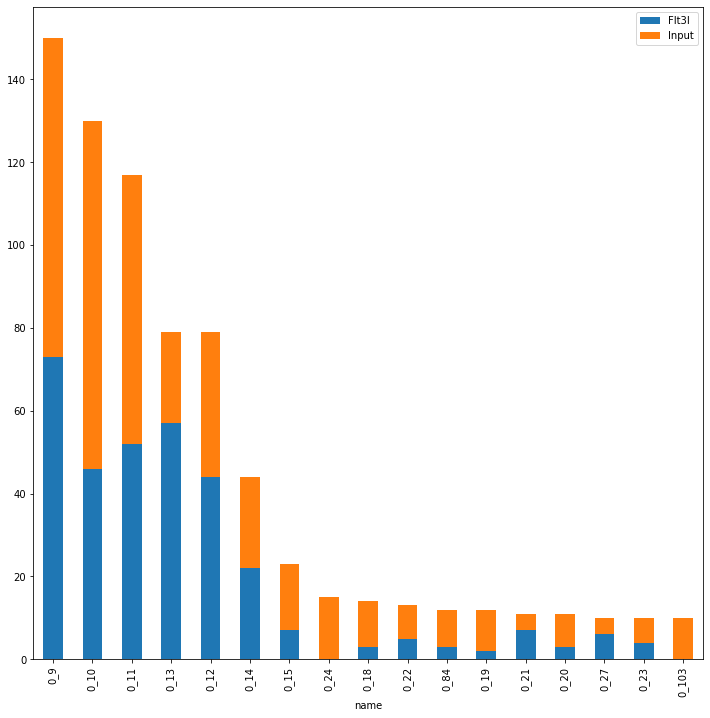

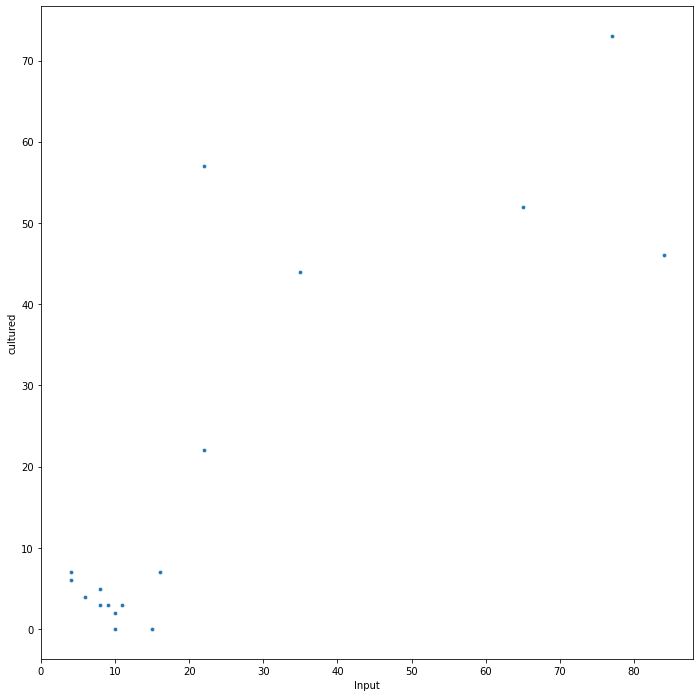

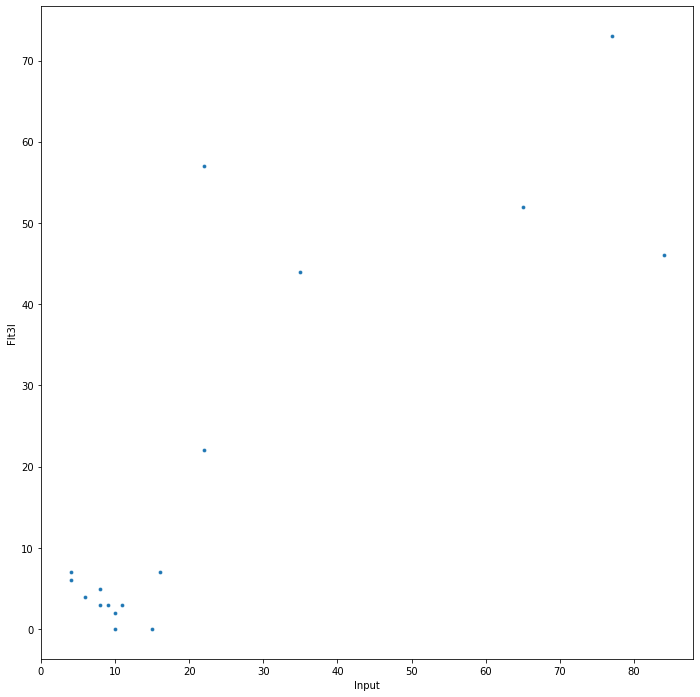

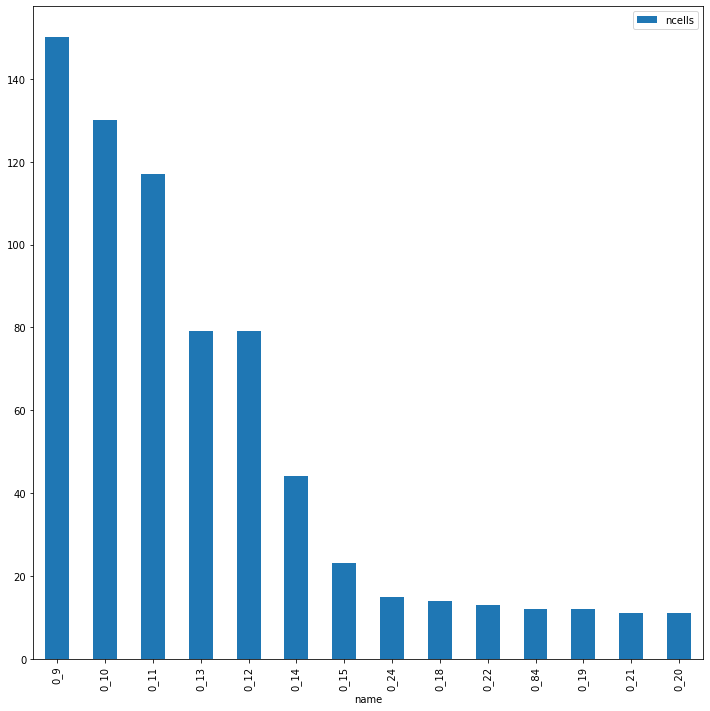

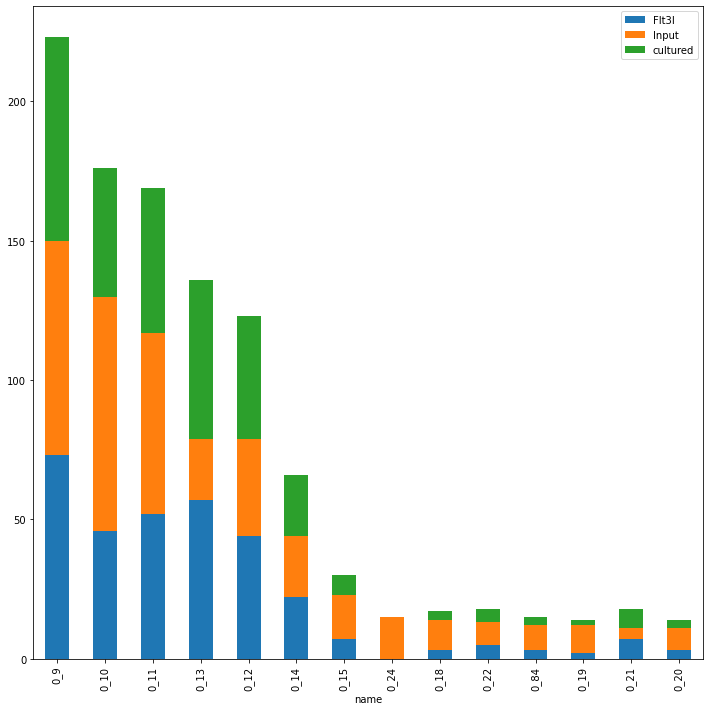

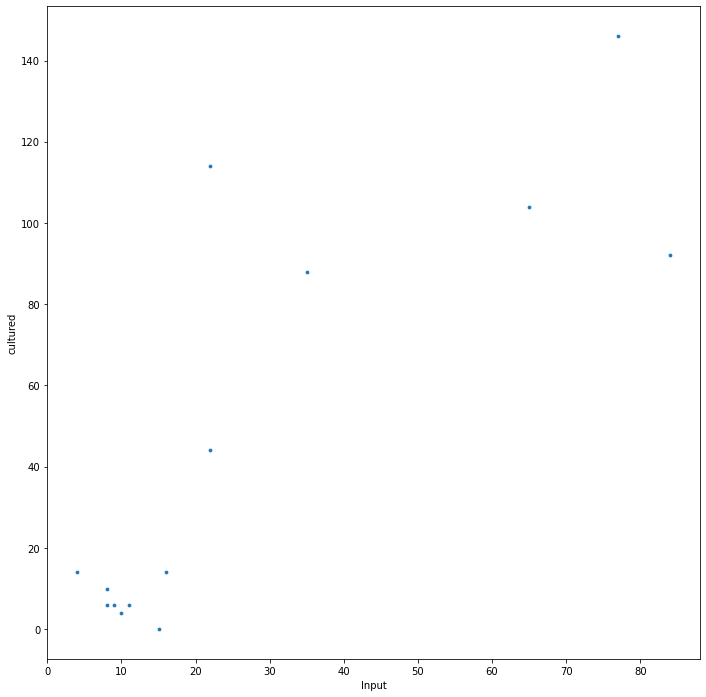

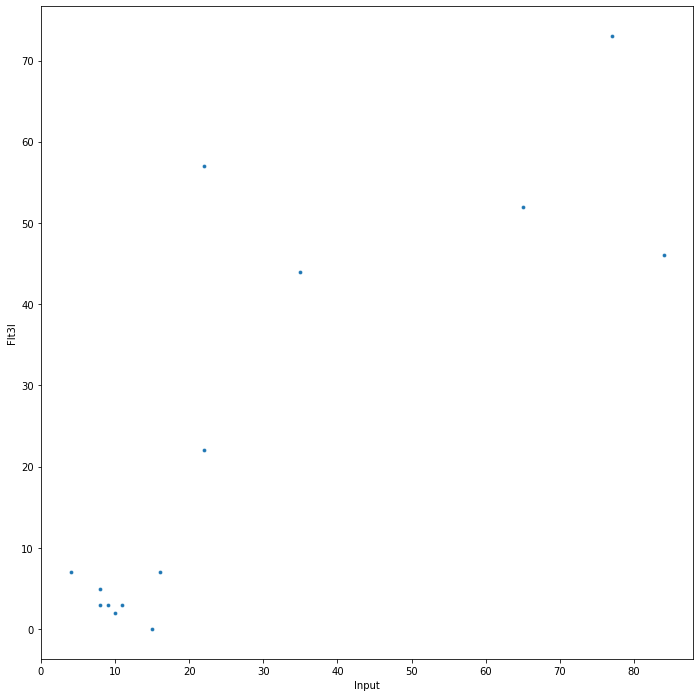

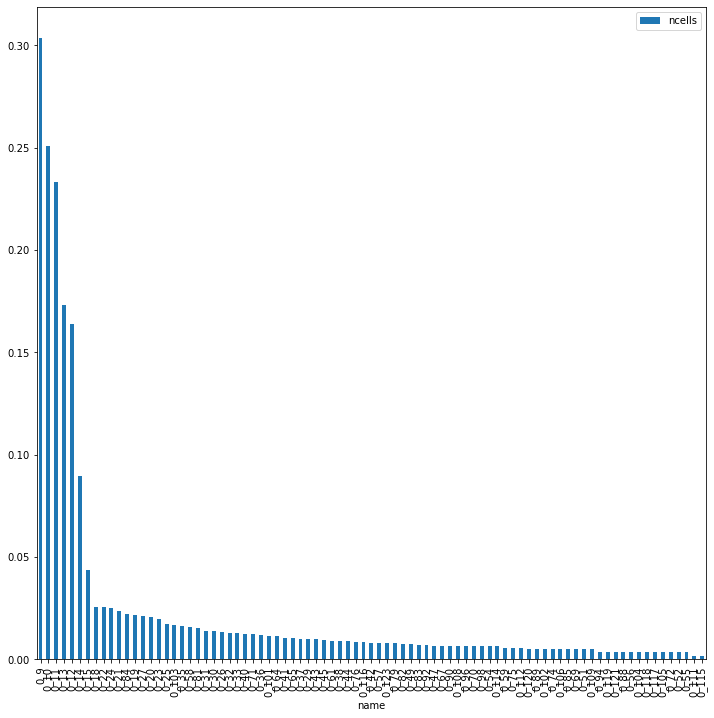

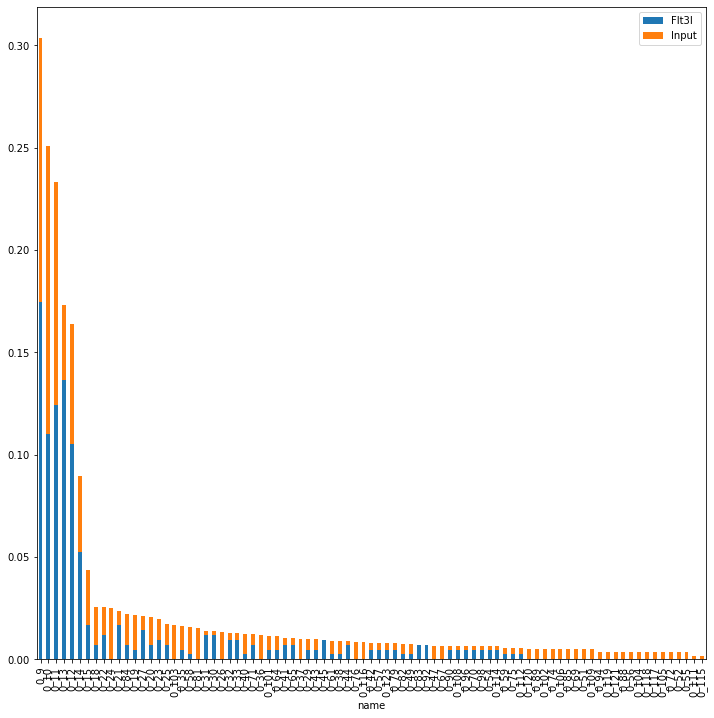

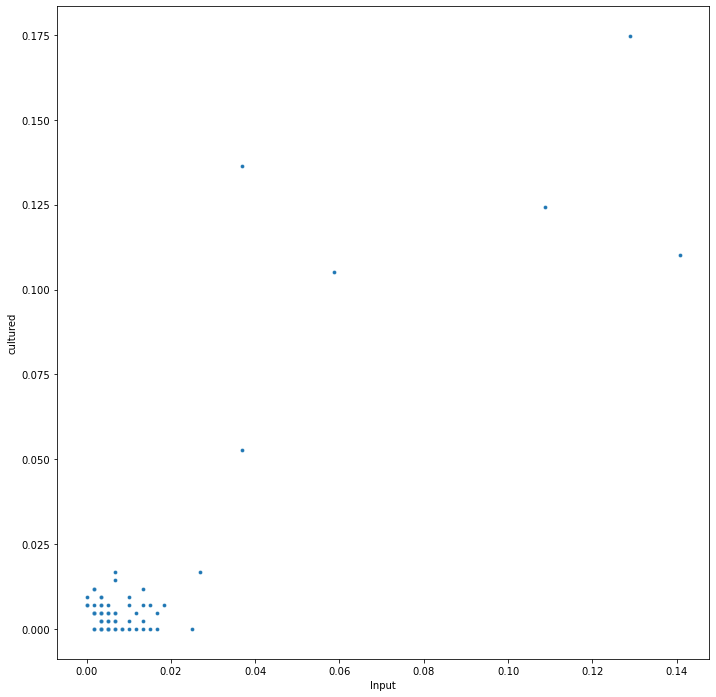

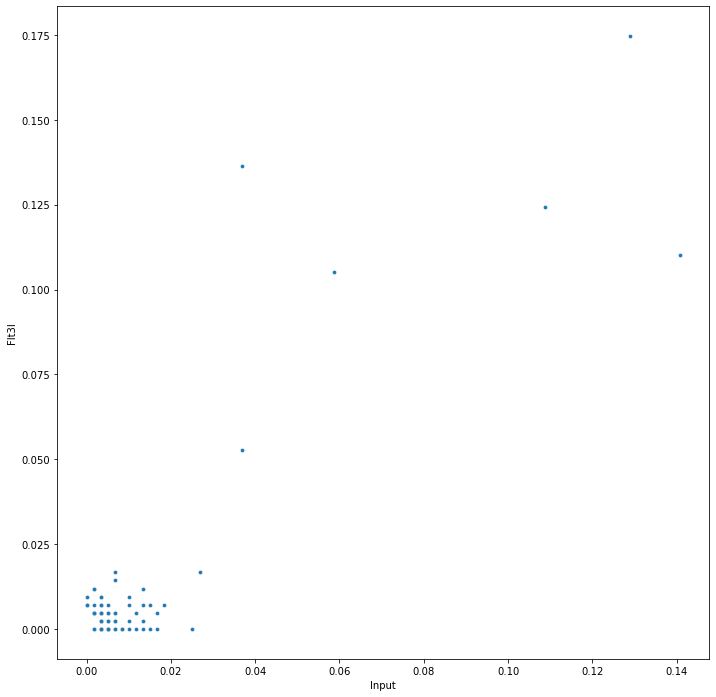

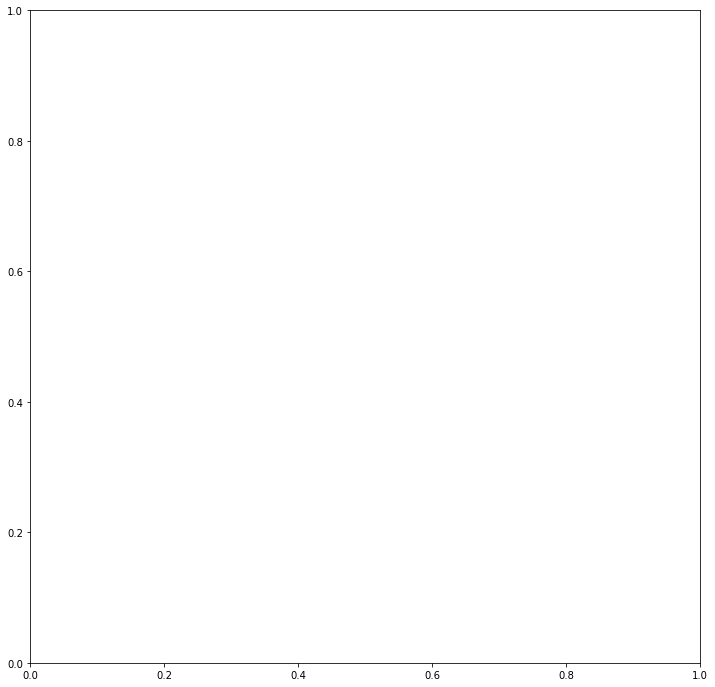

<Figure size 432x288 with 0 Axes>

In [19]:
for d, curr_df in clone_counts_filt_10_df.groupby("donor"):
    print(d)
    if "cultured" in curr_df.columns:
        curr_df = curr_df.drop("cultured", axis=1)
    plots(curr_df, name=f"donor{d}.clone_counts")
    plots(keep_top_clones(curr_df, n_top=20, min_cell=min_cell),
      name=f"donor{d}.top20_minCell{min_cell}_clone_counts")
    

    clone_norm = clone_counts[clone_counts["donor"]==d].copy()
    clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/group_counts.loc[(x["condition"], x["donor"])] , axis=1)

    print("sum of normed values", clone_norm.groupby(["condition", "donor"]).sum()["ncells"])

    #clone_norm = se_cells_meta.groupby(["name", "condition","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
    clone_norm = clone_norm[~(clone_norm["name"]=="None")]
    clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
    def get_clone_count(x):
        curr = clone_norm[clone_norm["name"]==x.name]
        return curr.set_index("condition")["ncells"]

    clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
    clone_norm_df

    plots(clone_norm_df, name=f"donor{d}.normalized_clone_counts")
    plots(keep_top_clones(clone_norm_df, n_top=20, min_cell=min_cell),
          name=f"donor{d}.normalized_top20_minCell{min_cell}_clone_counts")
